The famous MNIST Dataset is used for the purpose of Handwritten Digit Recognition. The train and test sets are downloaded from Kaggle. We started with preprocessing the data and then used three Machine Learning classifiers: 
- SVM
- Random Forest
- Logistic Regression 

with and without dimensionality reduction method (PCA). 
For each of the classifier, accuracy and training time are calculated, along with the confusion matrix. In a separate notebook, we will use Convolutional Neural Network (using Keras) to train the same dataset and obtain the results.

80% of the original train set (as provided in the Kaggle site) is used for training the models and the rest is used as validation set. The validation set is used for the purpose of model evaluation. The test set is used for predicting the labels for each of the sample. We have also shown the predicted label for the first 100 test samples.

For the purpose of dimensionality reduction, PCA is used with variance 95%.

Both the train and test sets are normalized (divided by 255) to represent the pixels in the range 0-1. 

The models are run in Windows 10 operating system, processor Intel(R)Core(TM)i5-7200U CPU @ 2.50GHz 2.71 GHz and 8.00GB RAM

## DATA PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import metrics
import time
import datetime as dt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


It can be seen that the train and the test set contain 784 features (pixels)

In [8]:
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
x_test = test.values

We are looking for bias in the dataset towards a particular digit. The barplot below shows that though the number of digits are almost equal, it is slightly biased towards digit 1. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

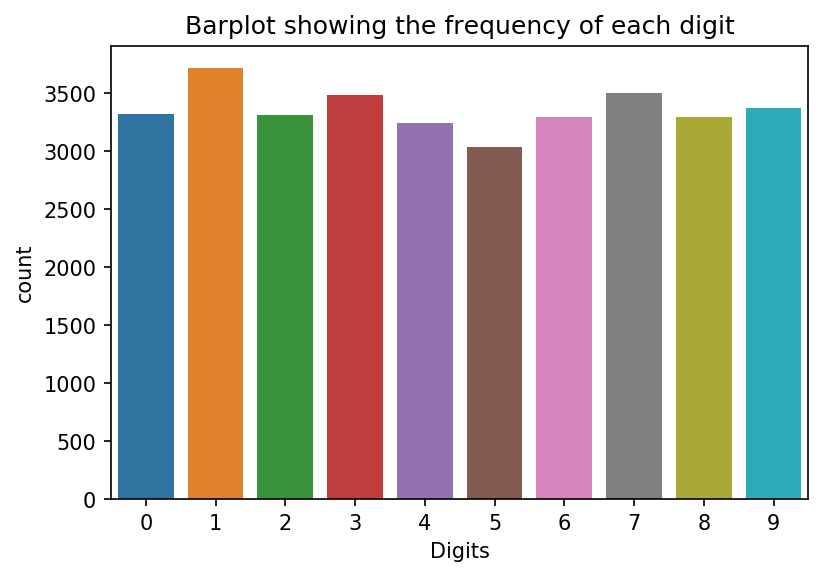

In [25]:
fig = plt.figure(dpi=150)
sns.countplot(y_train)
plt.xlabel('Digits')
plt.title('Barplot showing the frequency of each digit')
plt.tight_layout

#### MNIST Dataset

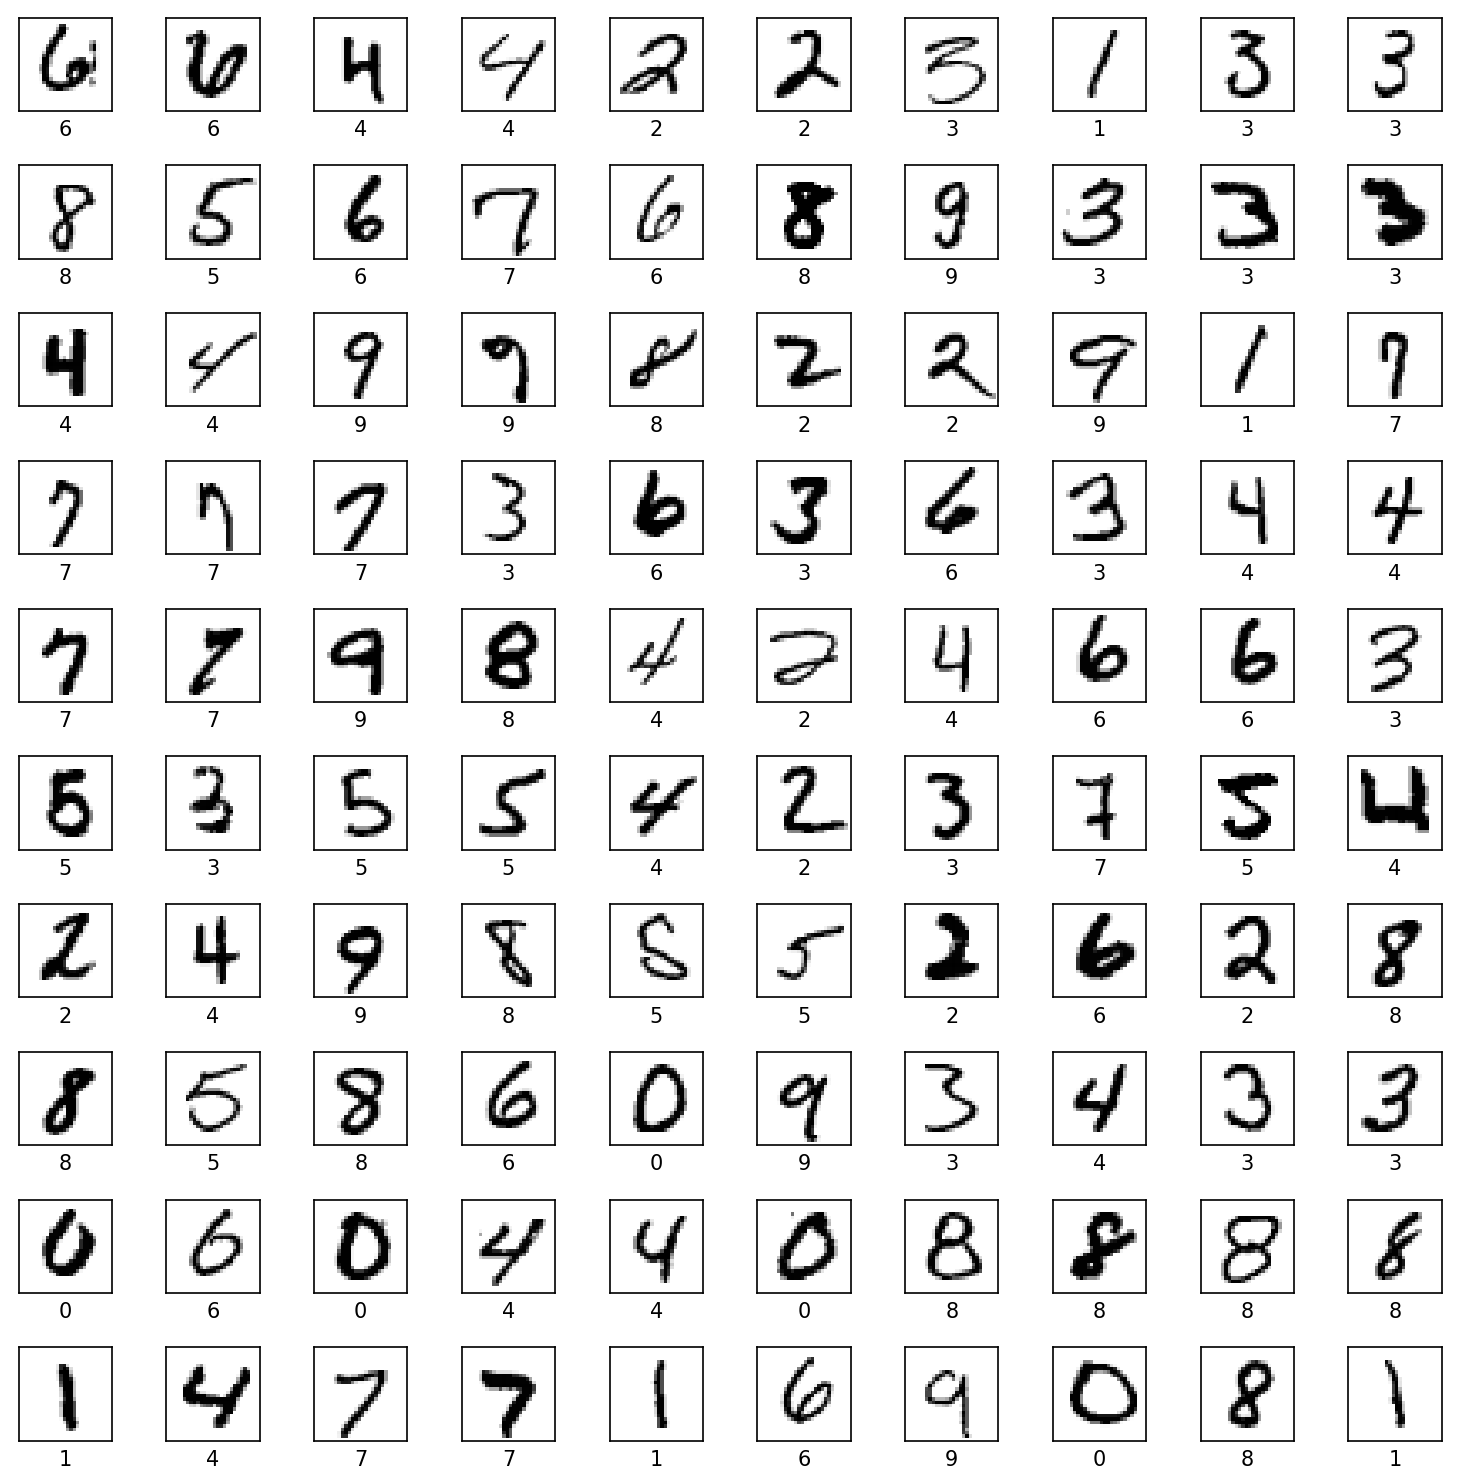

In [29]:
fig, ax = plt.subplots(10, 10, figsize=(10,10), dpi=150)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_train[i])
    axi.set(xticks=[], yticks=[])

plt.tight_layout()


Normalization of the train and test sets

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                   test_size=0.2, random_state=0)

#### Prinicipal Component Analysis

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

## SUPPORT VECTOR MACHINES CLASSIFIER

### Without Dimensionality Reduction Method

We have picked random hyperparameters for SVM. We tried with the default values, but they reduce the accuracy and increase the training time. A better method of hyperparameter selection would be through GridSearchCV. But due to the large number of datapoints, it takes way more time to determine. Therefore, we resorted to C = 100, and gamma = 0.001.

In [19]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.001, kernel='rbf', random_state=0)

In [20]:
time_start = dt.datetime.now()
svc.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [21]:
y_pred_val = svc.predict(x_val)

In [22]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

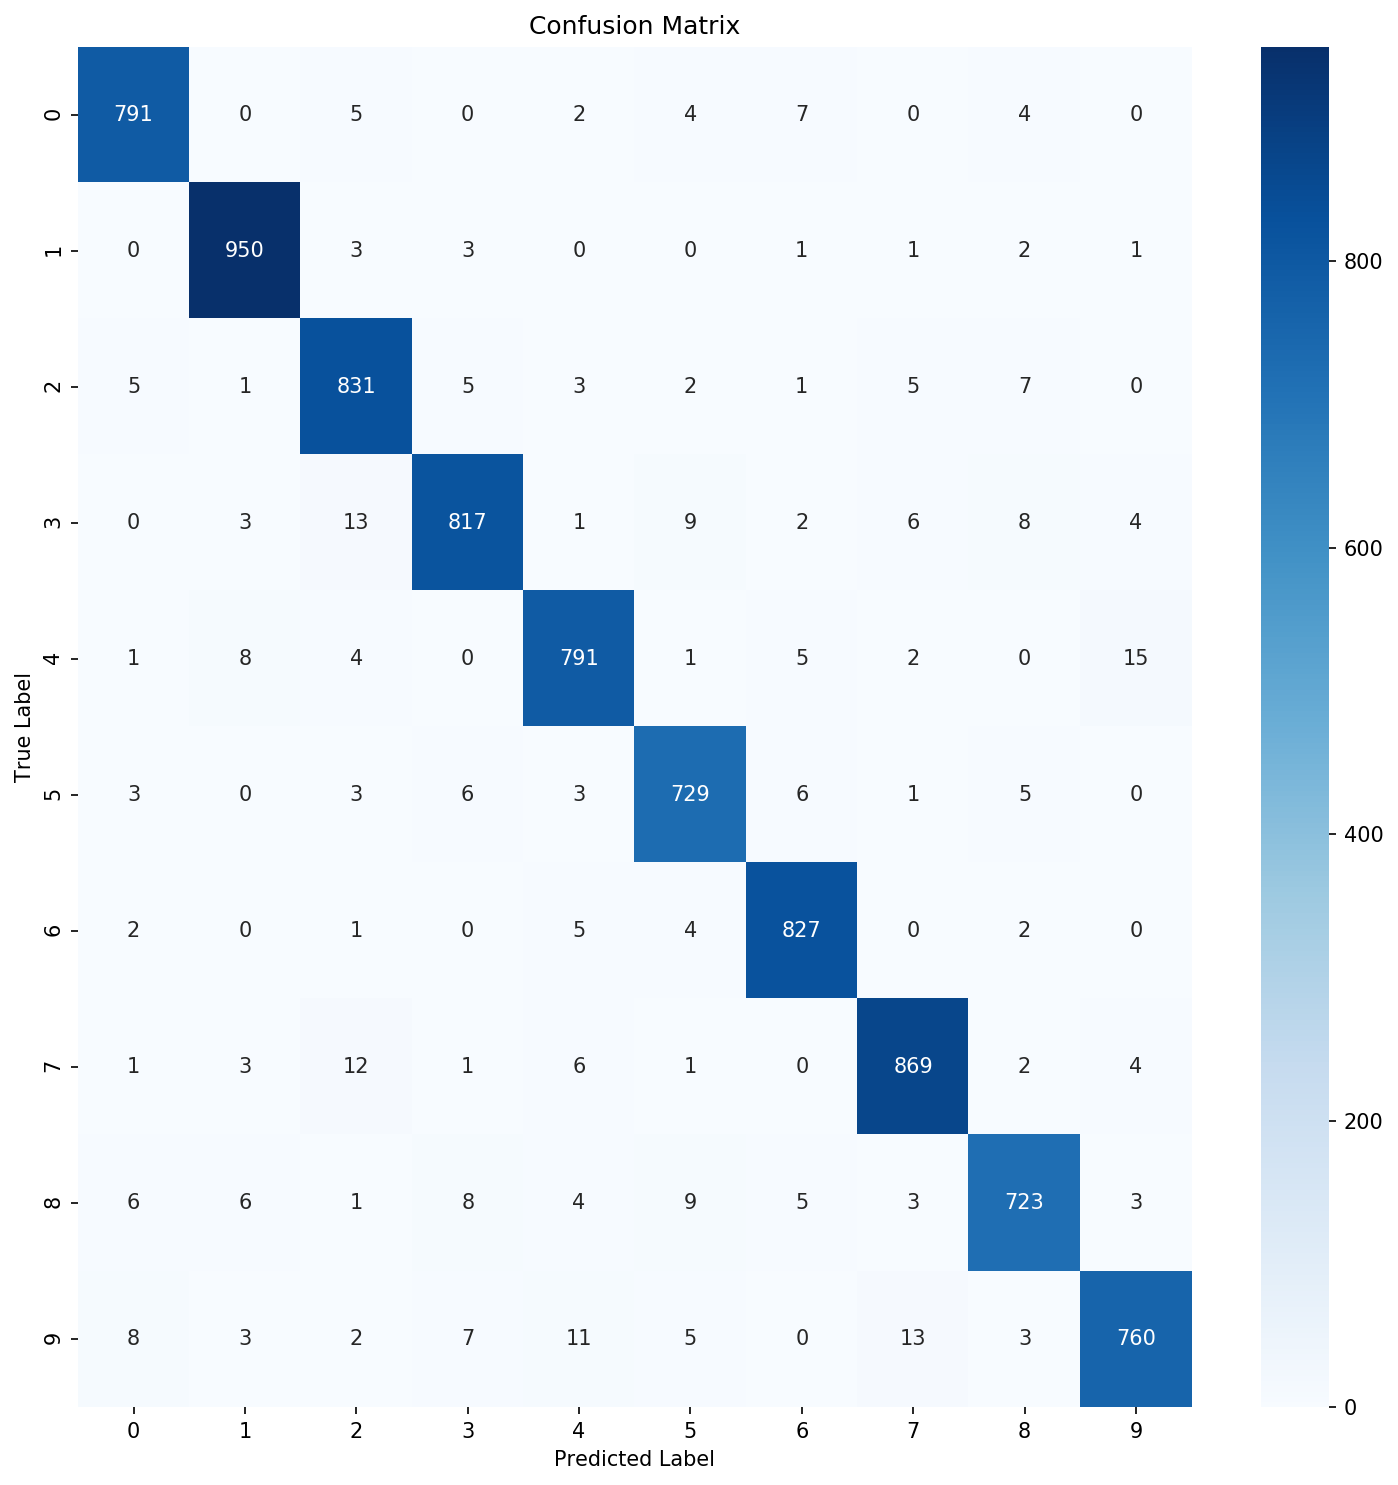

In [24]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [30]:
metrics.accuracy_score(y_val, y_pred_val)

0.9628571428571429

In [36]:
time_stop - time_start

datetime.timedelta(0, 234, 912184)

In [37]:
y_pred_test = svc.predict(x_test)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

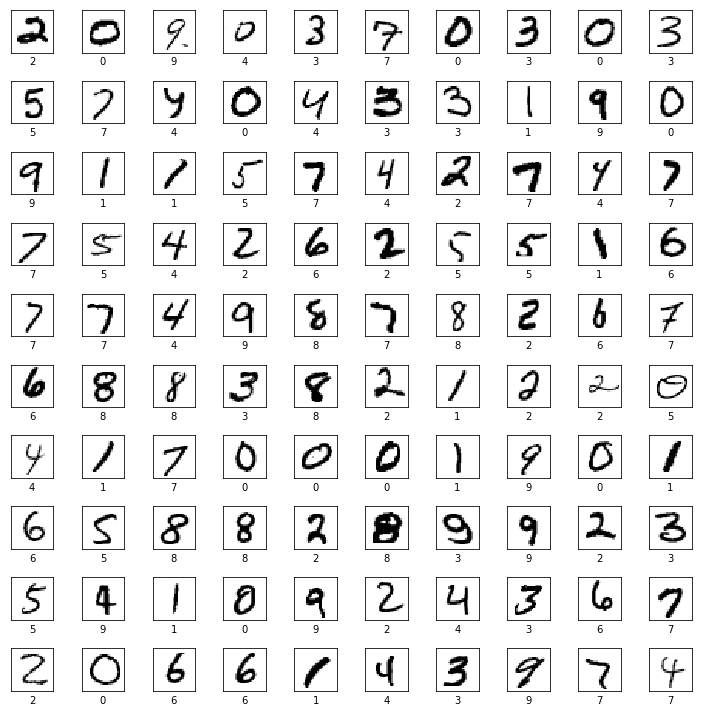

In [38]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy of SVM: 96.28%
- Time required: 234 secs

### With Principal Component Analysis

In [39]:
time_start = dt.datetime.now()
svc.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [40]:
y_pred_val = svc.predict(x_val_pca)

In [41]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

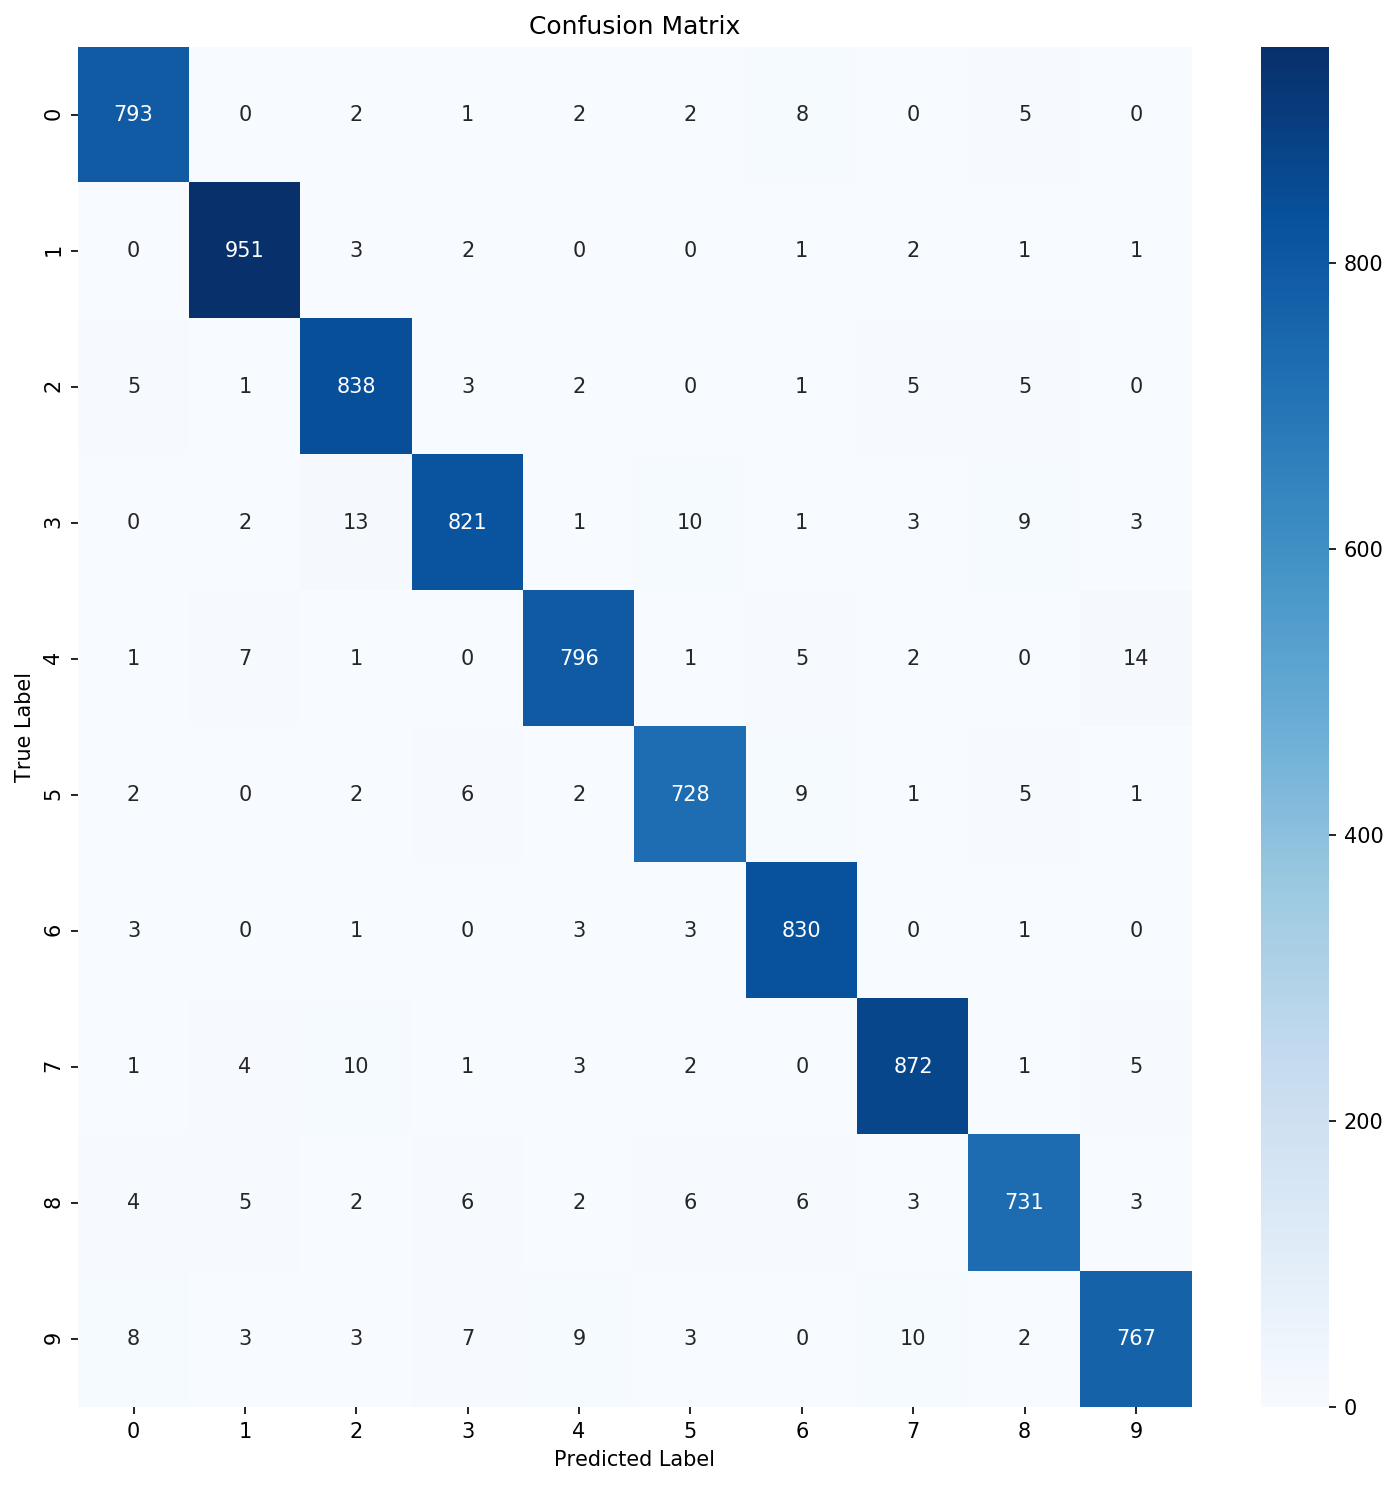

In [42]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [43]:
metrics.accuracy_score(y_val, y_pred_val)

0.9675

In [44]:
time_stop - time_start

datetime.timedelta(0, 32, 980495)

In [45]:
y_pred_test = svc.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

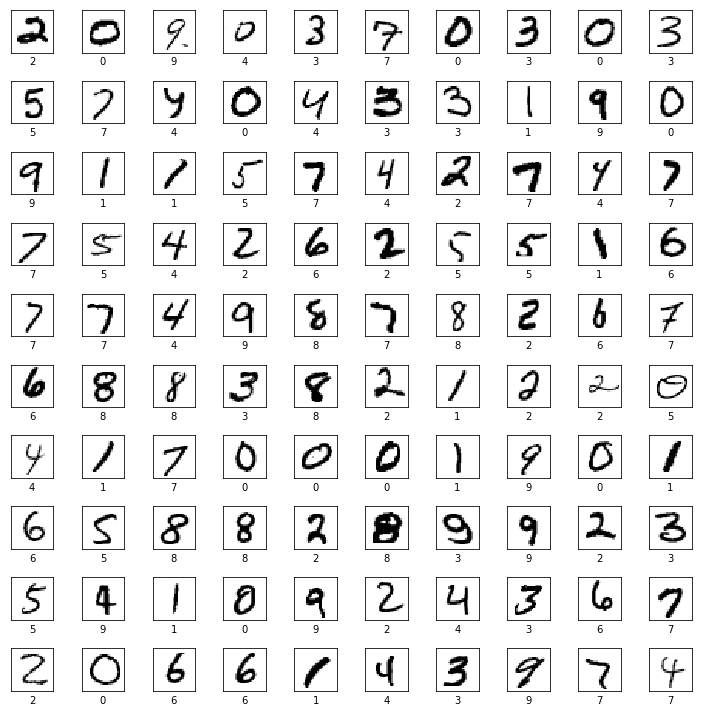

In [46]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 96.75%
- Time Required: 32 secs


## RANDOM FOREST CLASSIFIER

### Without Dimensionality Reduction Method

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=300, random_state=0)

In [48]:
time_start = dt.datetime.now()
random_clf.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [49]:
y_pred_val = random_clf.predict(x_val)

In [50]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

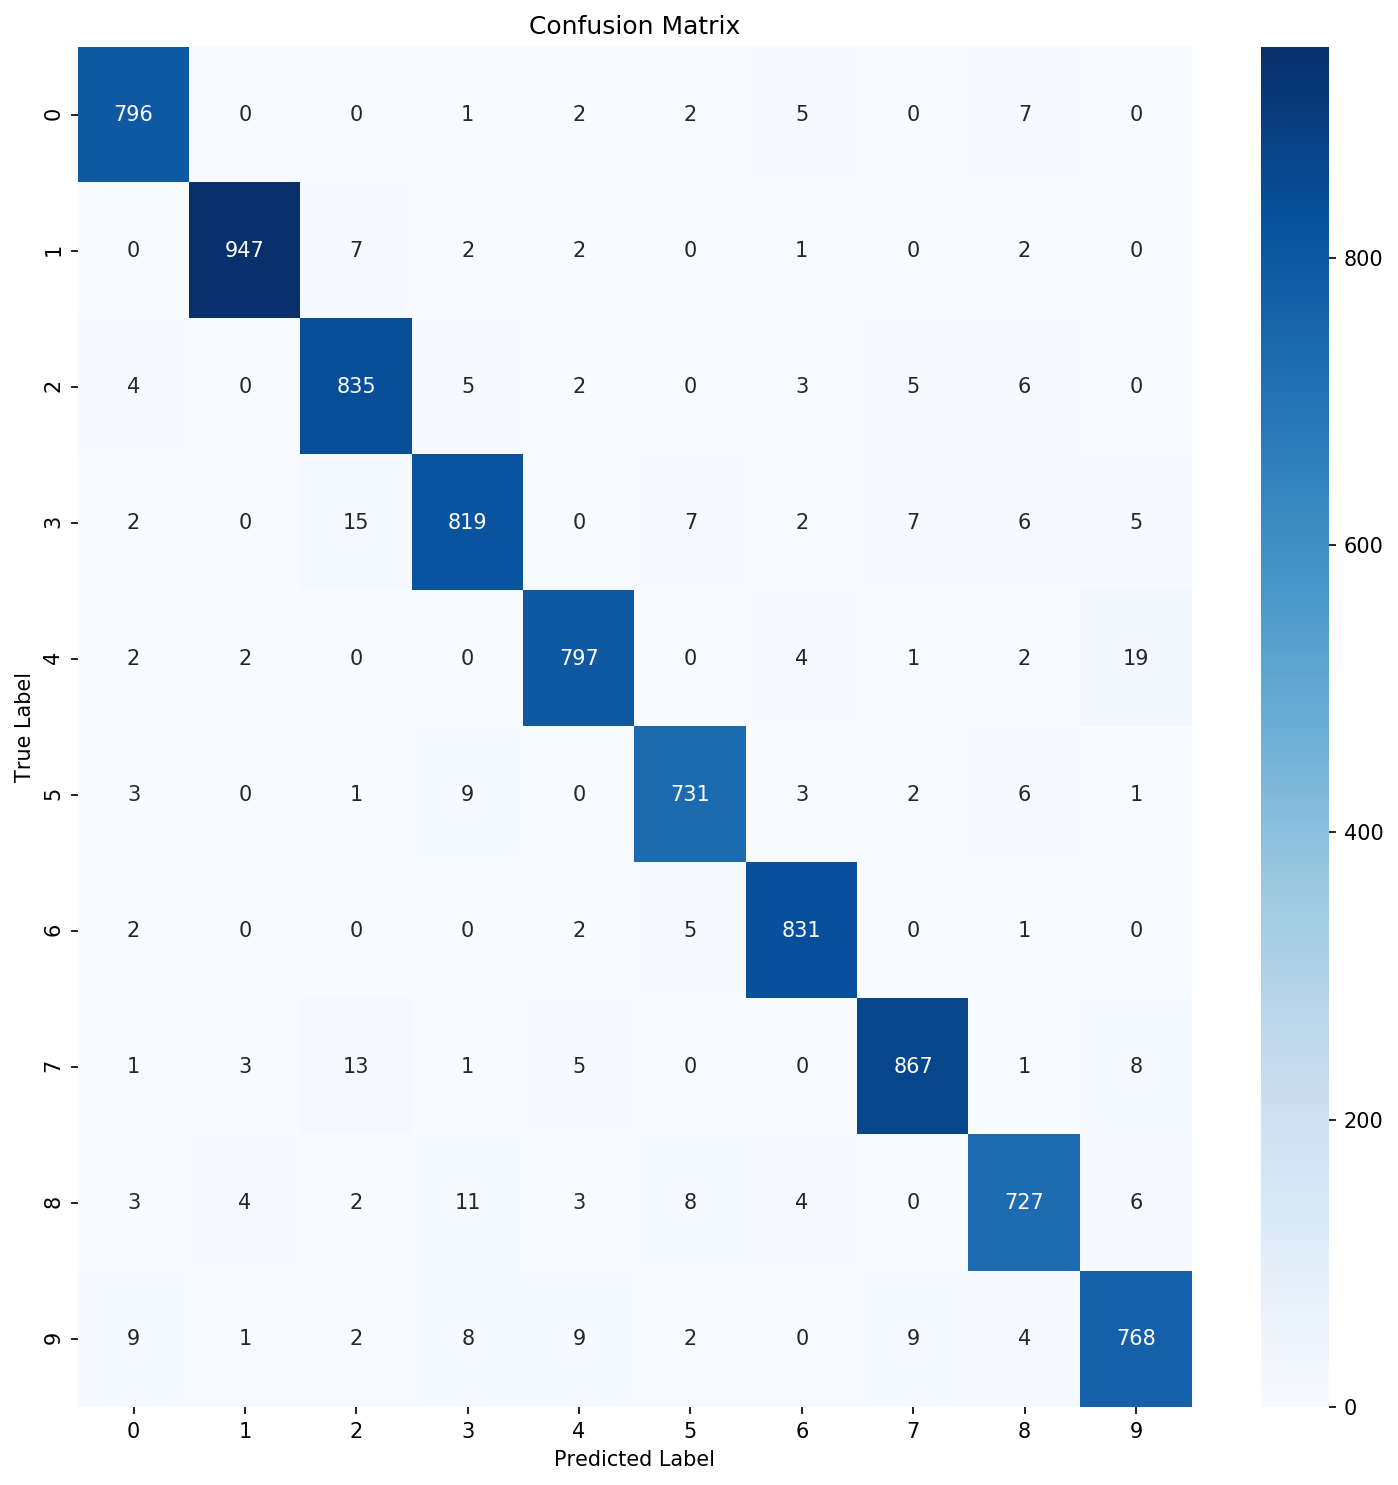

In [51]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [52]:
metrics.accuracy_score(y_val, y_pred_val)

0.9664285714285714

In [53]:
time_stop - time_start

datetime.timedelta(0, 62, 183335)

In [54]:
y_pred_test = random_clf.predict(x_test)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

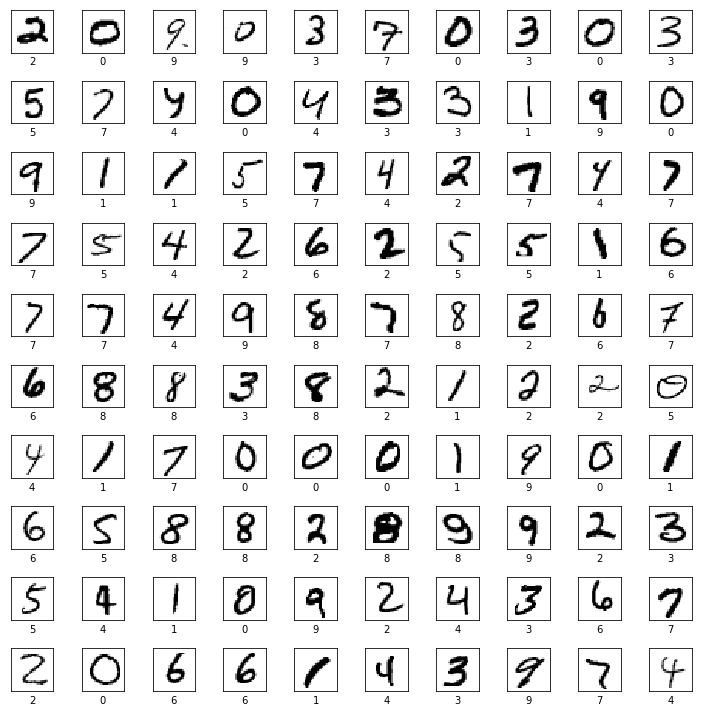

In [55]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy of Random Forest Classifier: 96.66%
- Time taken: 62 seconds

### With Principal Component Analysis

In [56]:
time_start = dt.datetime.now()
random_clf.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [57]:
y_pred_val = random_clf.predict(x_val_pca)

In [58]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

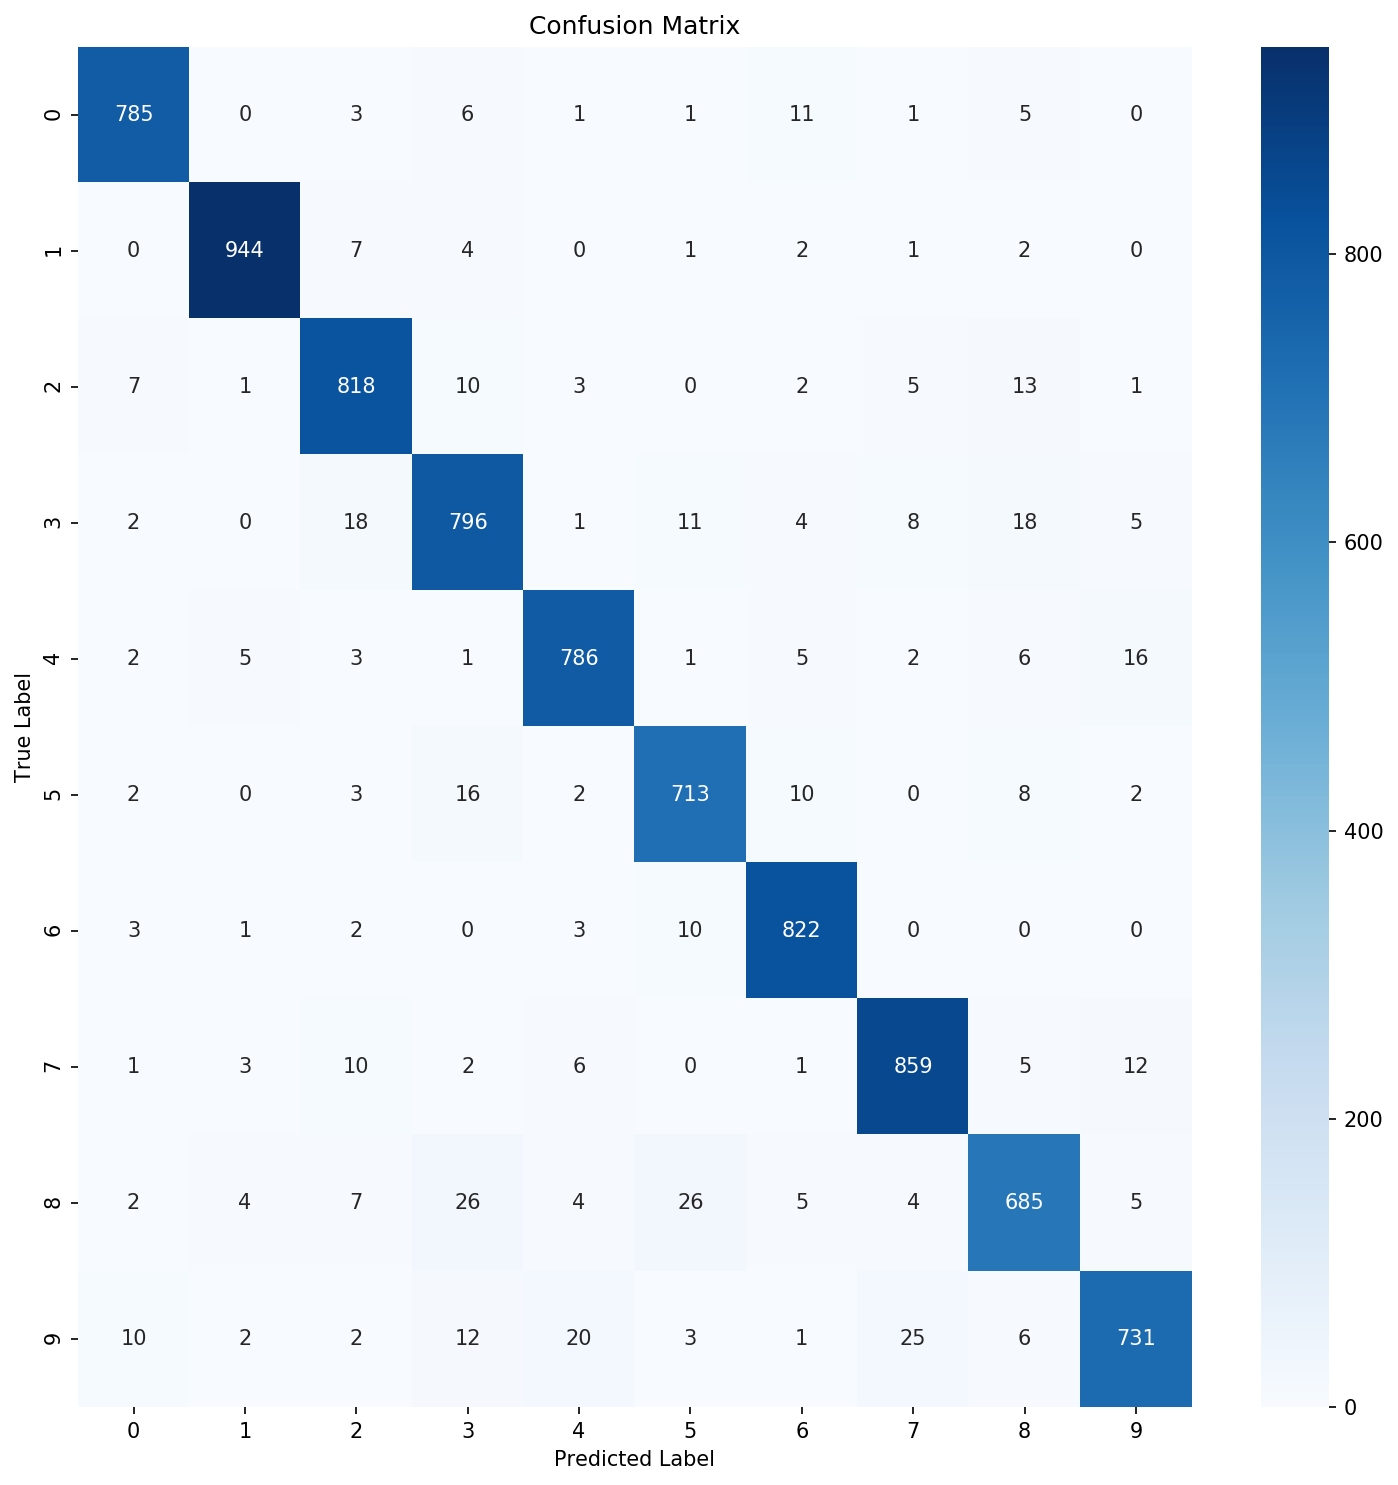

In [59]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [60]:
metrics.accuracy_score(y_val, y_pred_val)

0.9451190476190476

In [61]:
time_stop - time_start

datetime.timedelta(0, 163, 107424)

In [62]:
y_pred_test = random_clf.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

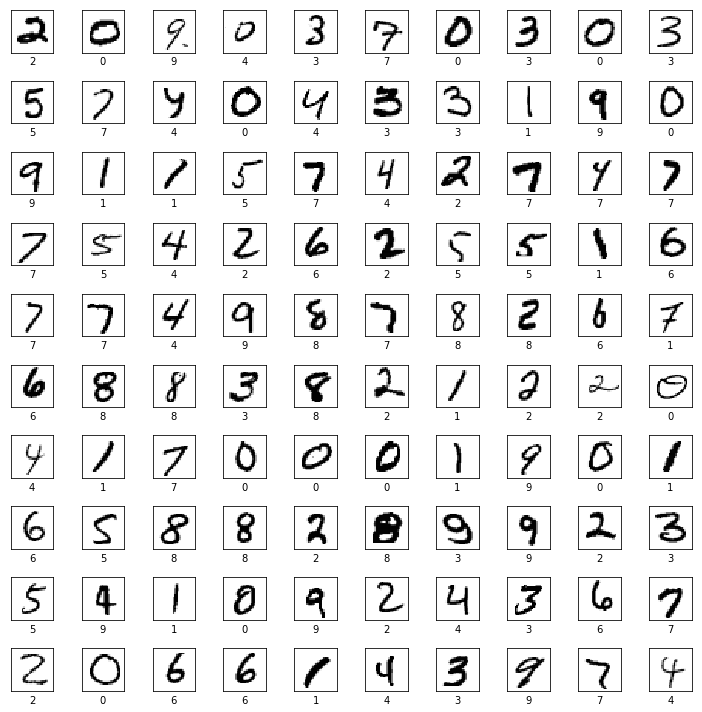

In [63]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 94.5%
- Time Required: 163 secs

## LOGISTIC REGRESSION CLASSIFIER

### Without Dimensionality Reduction Method

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [65]:
time_start = dt.datetime.now()
logreg.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [66]:
y_pred_val = logreg.predict(x_val)

In [67]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

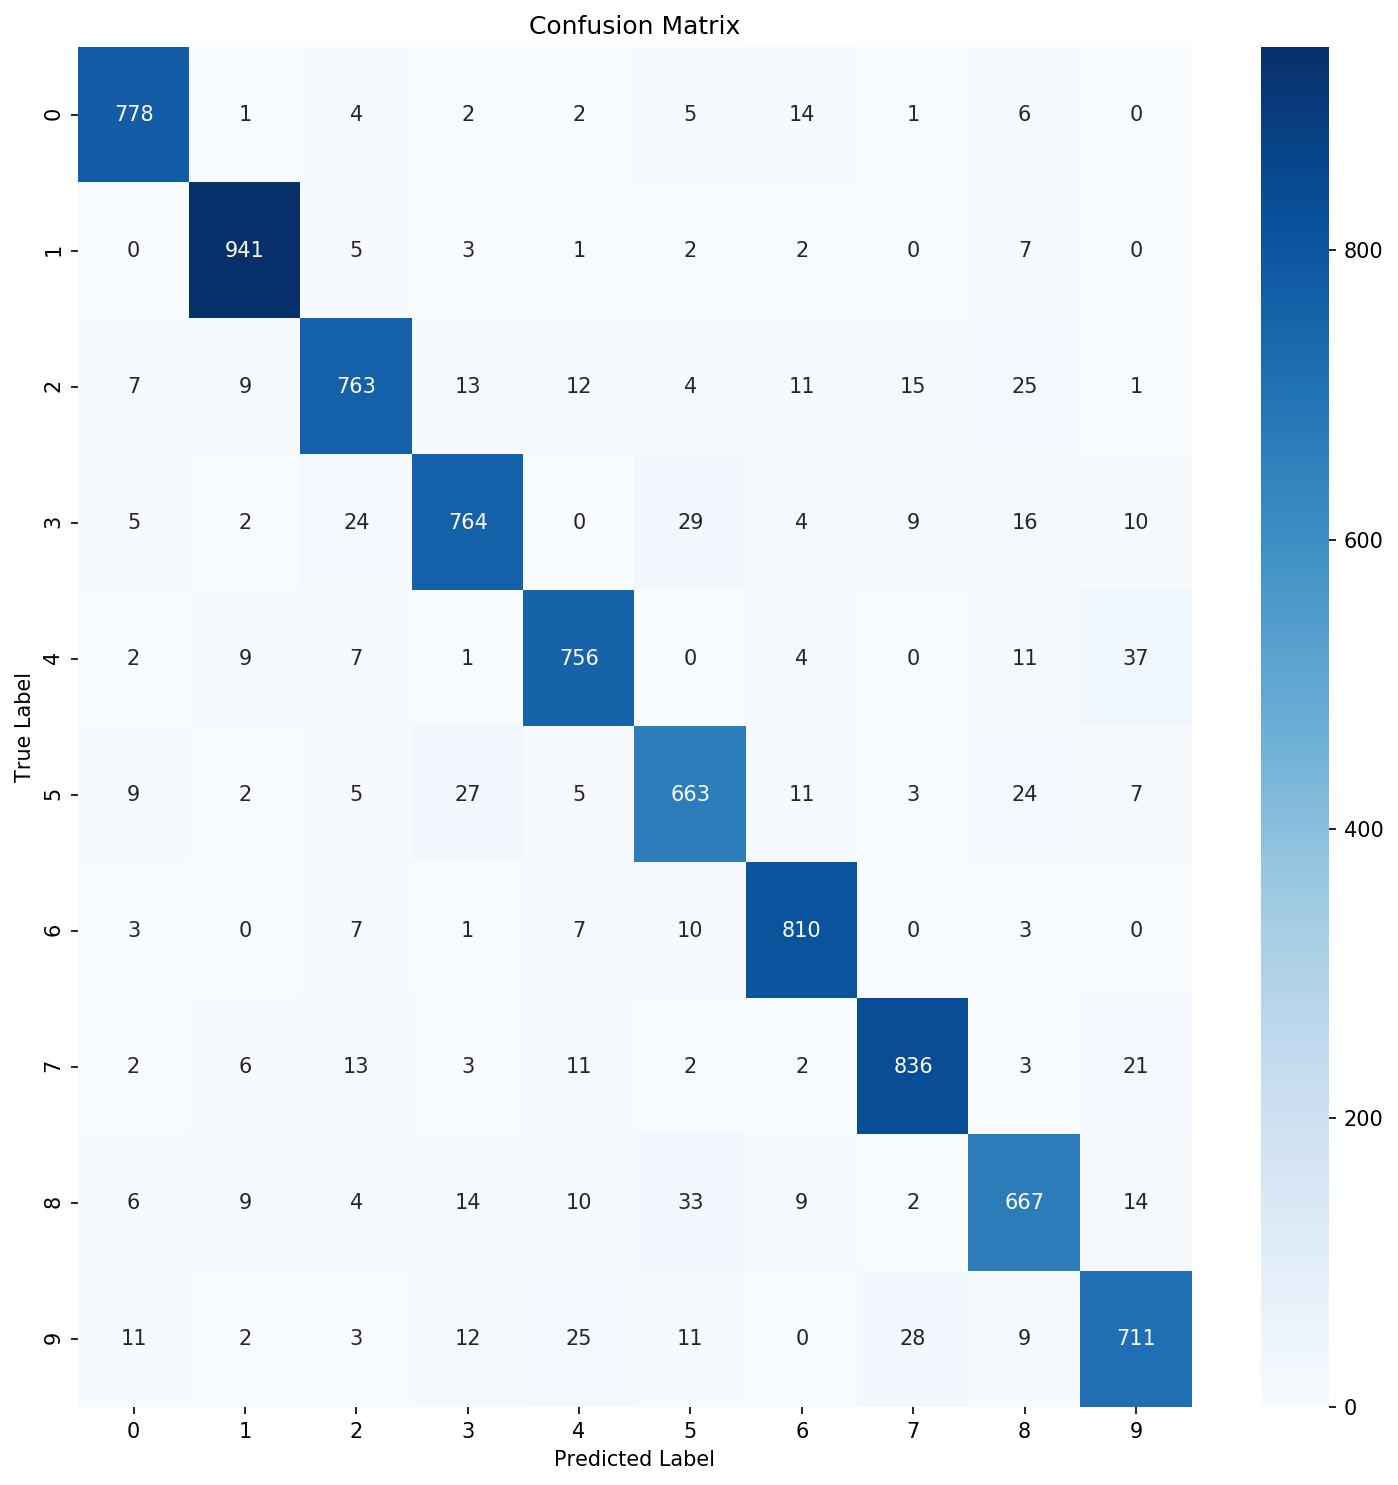

In [69]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [70]:
metrics.accuracy_score(y_val, y_pred_val)

0.9153571428571429

In [71]:
time_stop - time_start

datetime.timedelta(0, 36, 761291)

In [72]:
y_pred_test = logreg.predict(x_test)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

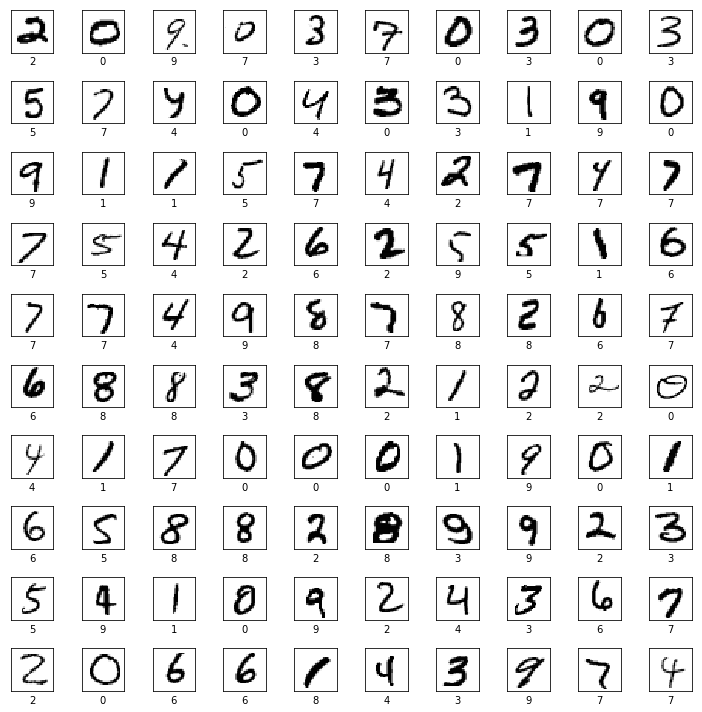

In [74]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 91.5%
- Time Required: 36 seconds

### With Principal Component Analysis

In [75]:
time_start = dt.datetime.now()
logreg.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [76]:
y_pred_val = logreg.predict(x_val_pca)

In [77]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

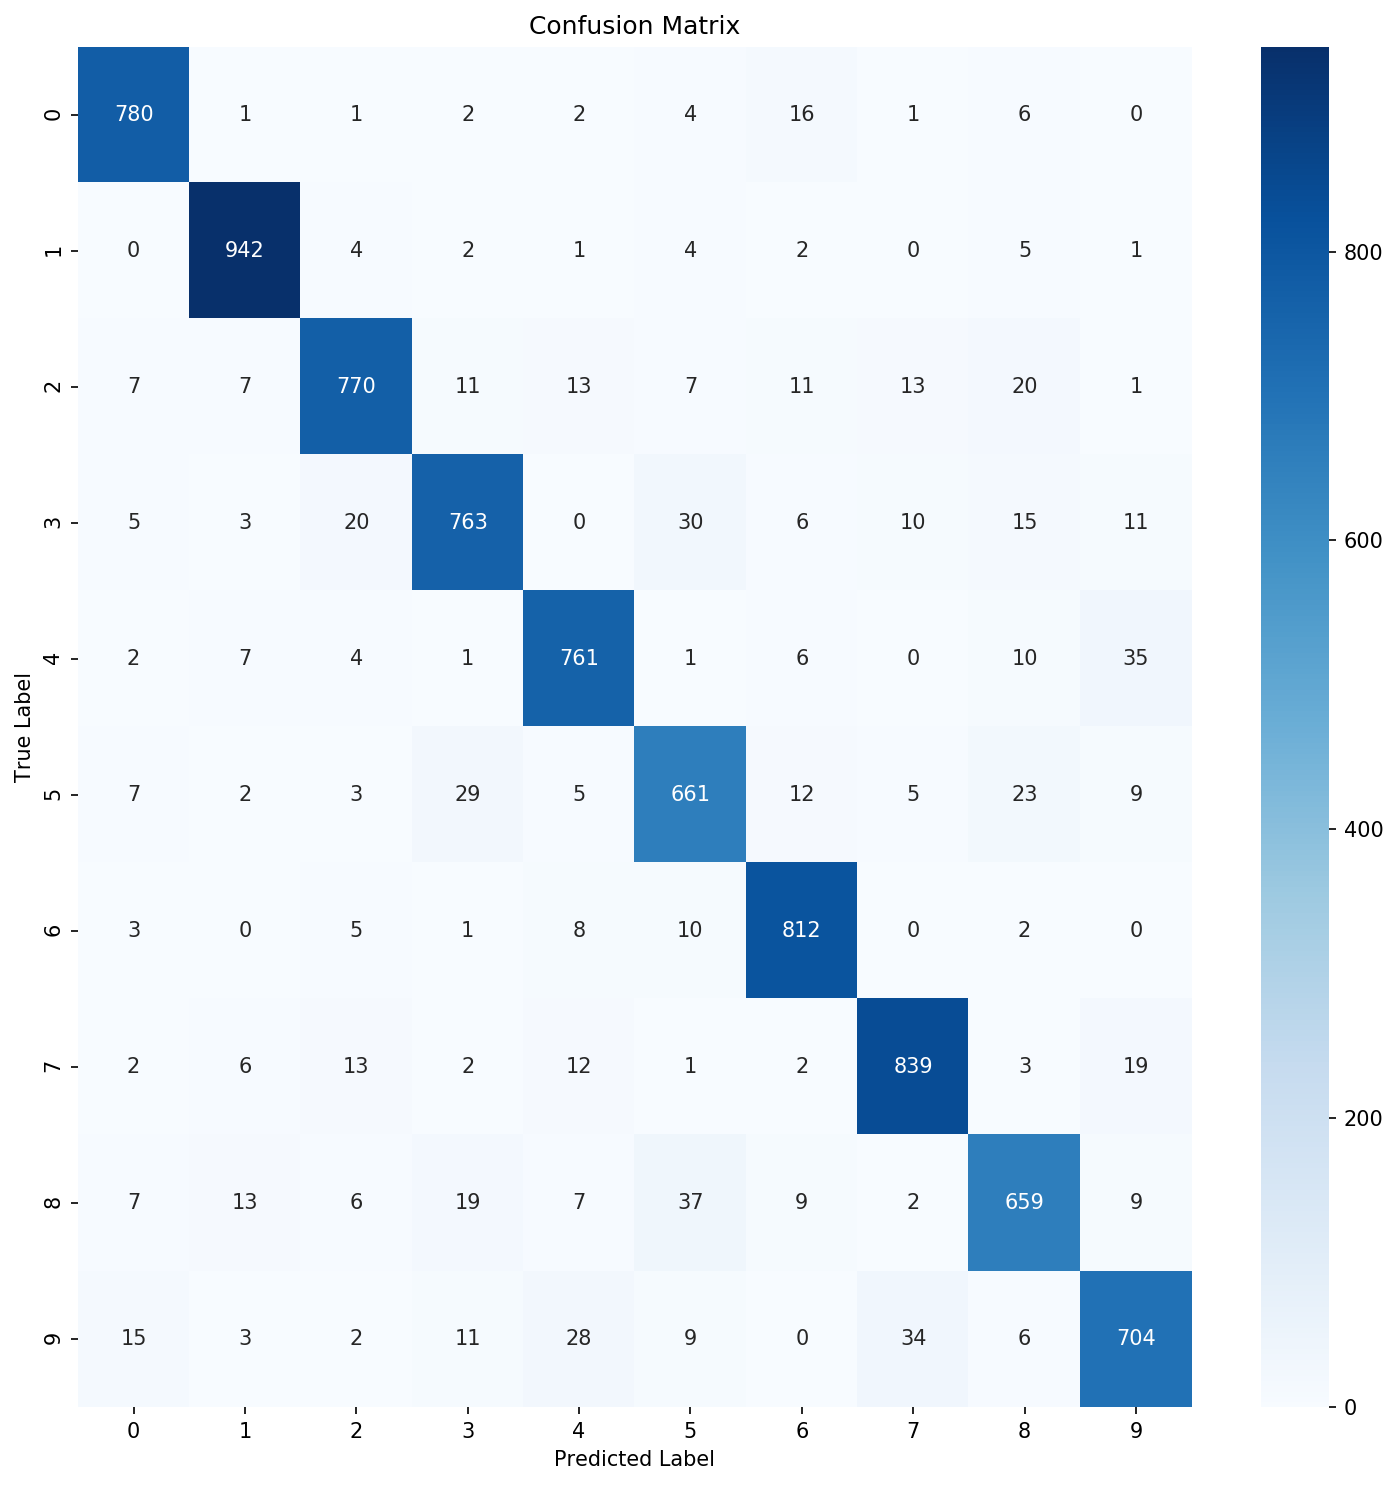

In [78]:
fig = plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [79]:
metrics.accuracy_score(y_val, y_pred_val)

0.9155952380952381

In [80]:
time_stop - time_start

datetime.timedelta(0, 28, 861812)

In [81]:
y_pred_test = logreg.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

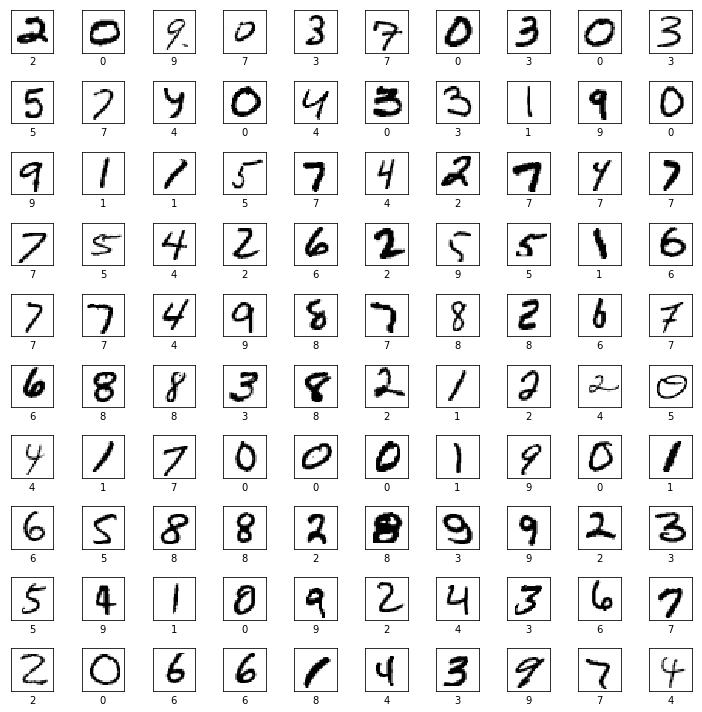

In [82]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 91.55%
- Time Required: 28 secs